In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [3]:
# uses several functions from pyPMIscore (generation of conformers, energy minimization)
sys.path.append('../pyPMIscore')
from pyPMIscore import mmff_opt_confs

In [4]:
# selected_set.sdf - 500 protein-bound structures of fragment-like small molecules,
# extracted from PDB Ligand Expo as a ECFP4-based diversity set. Just for the test.

In [5]:
lib = Chem.SDMolSupplier('selected_set.sdf')

In [6]:
def conformer_energy(mol):
    '''Minimizes conformation and returns its energy.
    Dangerous! Very poor exception handling'''
    try:
        mol_ff_param = AllChem.MMFFGetMoleculeProperties(mol)
        ff = AllChem.MMFFGetMoleculeForceField(mol, mol_ff_param)
        convergence = ff.Minimize(maxIts=1000)
        min_energy = ff.CalcEnergy()
        if convergence != 0:
            min_energy = None
        return min_energy
    except:
        pass

In [7]:
lib_deltaE = list()
for mol in lib:
    molh = Chem.AddHs(mol, addCoords = True)
    energy = conformer_energy(molh)
    if energy is None:
        continue
    else:
        lib_deltaE.append(energy - min(mmff_opt_confs(molh)[1])[1])

Text(0.5, 0, 'Energy (kcal/mol)')

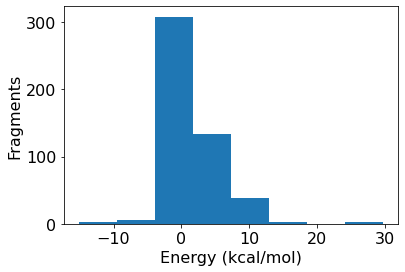

In [10]:
plt.rcParams.update({'font.size': 16})
plt.hist(lib_deltaE, bins=8)
plt.ylabel("Fragments")
plt.xlabel("Energy (kcal/mol)")

In [11]:
len(lib_deltaE)

493

In [12]:
print(np.percentile(lib_deltaE, 5),np.percentile(lib_deltaE, 95)) # 90% of conformers

-0.409744920883753 9.195634621019336


In [13]:
# looking for exceptional cases - e.g. deltaE bellow 0 or significantly above 10 kcal/mol.
# curious to see how do they look!
import pandas as pd

In [57]:
df = pd.DataFrame()

In [58]:
df["Mol"] = [Chem.AddHs(mol, addCoords = True) for mol in lib]
df["Bound conf. energy"] = [conformer_energy(mol) for mol in df["Mol"]]
df["Conformers"] = [mmff_opt_confs(mol) for mol in df["Mol"]]

RDKit ERROR: [10:18:51] UFFTYPER: Unrecognized atom type: Se2+2 (6)
RDKit ERROR: [10:19:21] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [10:19:21] UFFTYPER: Unrecognized atom type: Se2+2 (1)
RDKit ERROR: [10:19:46] UFFTYPER: Unrecognized charge state for atom: 10


In [59]:
df

,Mol,Bound conf. energy,Conformers
0,<rdkit.Chem.rdchem.Mol object at 0x7f66b2285260>,37.319144,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22852...
1,<rdkit.Chem.rdchem.Mol object at 0x7f66b2285210>,-21.818713,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22852...
2,<rdkit.Chem.rdchem.Mol object at 0x7f66b22852b0>,-138.469760,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22852...
3,<rdkit.Chem.rdchem.Mol object at 0x7f66b2285300>,1.362394,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22853...
4,<rdkit.Chem.rdchem.Mol object at 0x7f66b2285350>,48.212889,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22853...
...,...,...,...
495,<rdkit.Chem.rdchem.Mol object at 0x7f66b22a70d0>,112.488079,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22a70...
496,<rdkit.Chem.rdchem.Mol object at 0x7f66b22a7120>,0.299370,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22a71...
497,<rdkit.Chem.rdchem.Mol object at 0x7f66b22a7170>,59.926607,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22a71...
498,<rdkit.Chem.rdchem.Mol object at 0x7f66b22a71c0>,-45.017681,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22a71...


In [74]:
df["Energy"] = [df["Bound conf. energy"][i] - min(df["Conformers"][i][1])[1] for i in range(len(df))]

In [75]:
df

,Mol,Bound conf. energy,Conformers,Energy
0,<rdkit.Chem.rdchem.Mol object at 0x7f66b2285260>,37.319144,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22852...,1.536107e+00
1,<rdkit.Chem.rdchem.Mol object at 0x7f66b2285210>,-21.818713,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22852...,6.627715e+00
2,<rdkit.Chem.rdchem.Mol object at 0x7f66b22852b0>,-138.469760,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22852...,6.301870e+00
3,<rdkit.Chem.rdchem.Mol object at 0x7f66b2285300>,1.362394,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22853...,3.366733e+00
4,<rdkit.Chem.rdchem.Mol object at 0x7f66b2285350>,48.212889,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22853...,2.797244e-02
...,...,...,...,...
495,<rdkit.Chem.rdchem.Mol object at 0x7f66b22a70d0>,112.488079,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22a70...,-2.952301e-08
496,<rdkit.Chem.rdchem.Mol object at 0x7f66b22a7120>,0.299370,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22a71...,4.046974e+00
497,<rdkit.Chem.rdchem.Mol object at 0x7f66b22a7170>,59.926607,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22a71...,-2.625889e-09
498,<rdkit.Chem.rdchem.Mol object at 0x7f66b22a71c0>,-45.017681,(<rdkit.Chem.rdchem.Mol object at 0x7f66b22a71...,3.604544e+00


In [85]:
df["Energy"].idxmax()

243

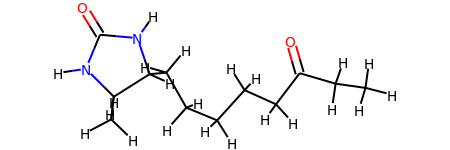

In [86]:
df["Mol"][243]

In [87]:
df["Conformers"][243]

(<rdkit.Chem.rdchem.Mol at 0x7f66b2296030>,
 [(1, -68.80324403112785),
  (0, -65.75498533828107),
  (1, -70.71287284224772),
  (0, -64.31224593437415),
  (1, -79.09241380141405),
  (1, -86.27213104831118),
  (1, -69.44848791081102),
  (1, -69.90850705163521),
  (1, -84.99383462206012),
  (1, -66.01436609654078),
  (1, -93.4013526408618),
  (0, -69.37863245098703),
  (1, -67.91244594842989),
  (1, -84.29453191251851),
  (0, -87.11626251897265),
  (1, -67.87533681840824),
  (1, -85.92548352713723),
  (1, -89.53459026492872),
  (1, -72.35112575496822),
  (1, -65.64694456282905),
  (1, -64.39705553760888),
  (1, -88.05823914442229),
  (0, -66.10001634212699),
  (0, -64.45471704320616),
  (0, -69.82616025021284),
  (1, -75.11864820649716),
  (1, -65.30702810514691)])

/mxn/home/vlatal/miniconda3/envs/fragmaxlib/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mxn/home/vlatal/miniconda3/envs/fragmaxlib/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Energy (kcal/mol)')

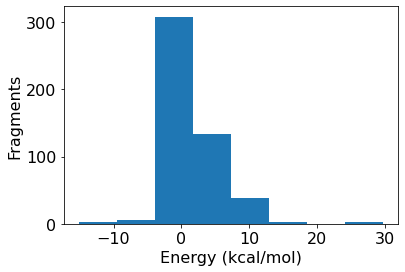

In [84]:
plt.rcParams.update({'font.size': 16})
plt.hist(df["Energy"], bins=8)
plt.ylabel("Fragments")
plt.xlabel("Energy (kcal/mol)")

In [92]:
# from pyPMIscore
def embed_confs(mol, seed=10, numConfs=27):
    ''' Embeds multiple conformations to a molecule,
    returns a list of conformation IDs. If the molecule
    is given as a SMILES string, rdkit.mol object is
    created and hydrated.
    '''
    if type(mol) is str:
        mol = Chem.AddHs(Chem.MolFromSmiles(mol), addCoords=True)

    conformers = AllChem.EmbedMultipleConfs(mol, pruneRmsThresh=0.5, numConfs=numConfs, randomSeed=seed)
    return list(conformers)

In [93]:
# from pyPMIscore
def mmff_opt_confs(mol, seed=10, numConfs=27):
    ''' Performes MMFF'94 optiomization of embed conformations,
    returns convergence and absolute energy value.
    '''
    embed_confs(mol, seed, numConfs)
    energies = Chem.rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(mol)
    return mol, energies

In [94]:
# from pyPMIscore
def converged_conformers(mol, energies, cutoff=10):
    '''Purges unconverged FF-optimized conformers,
    returns mol and a table with conformer ID and its
     minimized energy.
    (rdchem.Mol, [(confID, energy),...])
    '''
    conf_n_energies = list()
    for i in range(len(energies)):
        if energies[i][0] == 0:
            conf_n_energies.append((i, energies[i][1]))
        else:
            mol.RemoveConformer(i)
    return mol, conf_n_energies

In [116]:
converged_conformers(mmff_opt_confs(df['Mol'][243], 20)[0], mmff_opt_confs(df['Mol'][243], 20)[1])

(<rdkit.Chem.rdchem.Mol at 0x7f66b2296030>,
 [(0, -53.81586345514495),
  (3, -52.60557789024921),
  (5, -55.23747235676528),
  (6, -53.06040926027336),
  (9, -53.82246569163858),
  (11, -52.06092171890303),
  (13, -53.68469285154095),
  (15, -56.02491388220922),
  (17, -55.516550930365355),
  (21, -55.25391768581105),
  (22, -55.704644202702276),
  (24, -54.64894412131084),
  (25, -51.039704372032055)])

In [97]:
mol = df['Mol'][243]

In [102]:
L = mol.Cnfor

In [103]:
L

In [104]:
Chem.MolToMolFile(L, 'foo.mol')

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToMolFile(Conformer, str)
did not match C++ signature:
    MolToMolFile(RDKit::ROMol mol, std::string filename, bool includeStereo=False, int confId=-1, bool kekulize=True, bool forceV3000=False)

In [106]:
mol.AddConformer(mol.GetConformer(15))

15

In [111]:
mol.RemoveAllConformers()

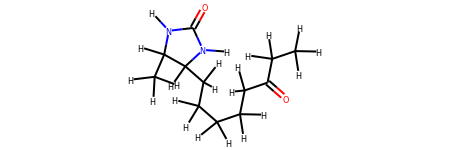

In [112]:
mol

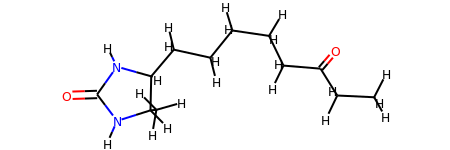

In [117]:
df["Mol"][243]

In [120]:
Chem.MolToMolFile(lib[243], "foo.mol")

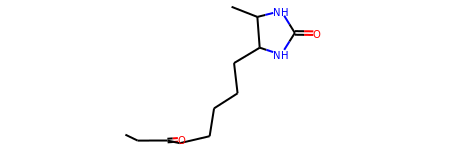

In [119]:
lib[243]

In [124]:
conformer_energy(Chem.AddHs(lib[243]))

-54.60366093522748

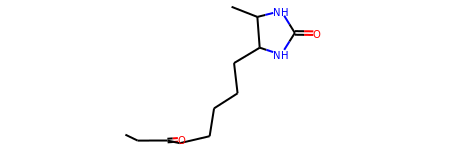

In [122]:
lib[243]